In [77]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

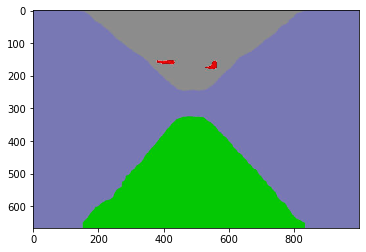

In [78]:
img = cv2.imread('8.jpg')
plt.imshow(img)
lower_green = np.array([0,150,0])
upper_green = np.array([10,200,30])
mask = cv2.inRange(img, lower_green, upper_green)
res = cv2.bitwise_and(img, img, mask= mask)

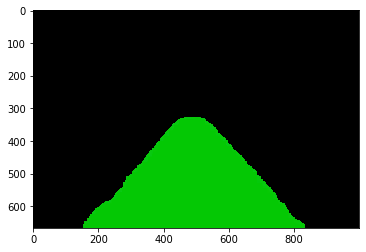

In [79]:
kernel = np.ones((15,15),np.uint8)
closing = cv2.morphologyEx(res, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing)
plt.show()

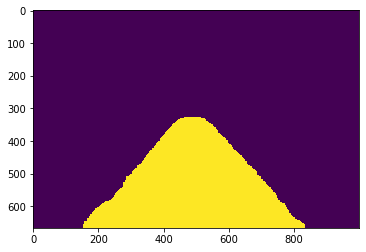

In [80]:
closing = cv2.cvtColor(closing, cv2.COLOR_BGR2GRAY)
closing[np.where(closing != 0)] = 255
plt.imshow(closing)

In [81]:
contours,hierarchy = cv2.findContours(closing, 1, 2)
cnt = contours[0]

In [82]:
hull = cv2.convexHull(cnt)
hull.shape

(24, 1, 2)

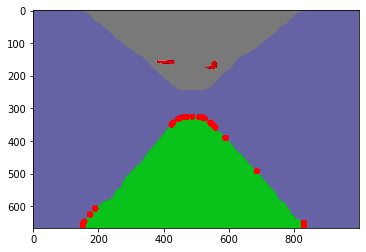

In [83]:
img = cv2.imread('8_points.jpg')
cv2.drawContours(img, hull, -10, (255,0,0), 20)
plt.imshow(img)

In [84]:
def getCornerPoints(points):
    kp=np.asarray(points,dtype='int')
    kp=np.reshape(kp,(-1,2))
    imax_x=np.argmax(kp[:,0])
    max_x=kp[imax_x,0]
    imax_y=np.argmax(kp[:,1])
    max_y=kp[imax_y,1]
    a2=kp[:,0]+max_y-kp[:,1]
    top_right=np.argmax(a2)
    a2=kp[:,0]+kp[:,1]
    top_left=np.argmin(a2)
    a2=kp[:,0]+kp[:,1]
    bottom_right=np.argmax(a2)
    a2=kp[:,1]+max_x-kp[:,0]
    bottom_left=np.argmax(a2)
    return top_left, top_right, bottom_left, bottom_right

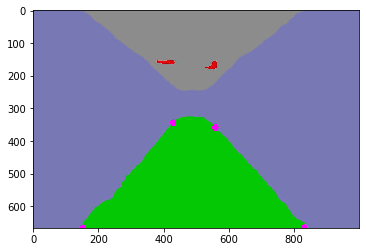

In [87]:
top_left, top_right, bottom_left, bottom_right = getCornerPoints(cnt)
kp = cnt
kp_arr=np.vstack((kp[bottom_left], kp[top_right], kp[top_left],kp[bottom_right]))
kp_arr=np.expand_dims(kp_arr,axis=0)
kp_arr=np.reshape(kp_arr,(4,1,2))
    
    
img = cv2.imread('8.jpg')
cv2.drawContours(img, kp_arr, -10, (255,0,255), 20)
plt.imshow(img)